In [106]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
import gensim
import csv
import json
import nltk
from gensim import corpora, models
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dense, Dropout, Embedding, Flatten, LSTM, Bidirectional
import itertools
from matplotlib import pyplot
from gensim.models.ldamulticore import LdaMulticore
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
import math
import seaborn as sns
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from scipy.sparse import csr_matrix
from keras.models import load_model
from gensim.models.coherencemodel import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('ted_talks_en.csv')

In [3]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir..."
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 

In [51]:
def text_preprocess(x):
    text = re.sub('[\[\(].*?[\)\]]', '', x)
    text = text.lower()
    punctuations = string.punctuation + '—“”’–'
    text = text.translate(str.maketrans(punctuations, ' '*len(punctuations)))
    text = word_tokenize(text)
    stops = set(stopwords.words("english"))
    text = [i for i in text if i not in stops]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(i, pos="v") for i in text]
    return text

In [57]:
text = [text_preprocess(x) for x in df['transcript']]

In [59]:
dictionary = gensim.corpora.Dictionary(text)
print('Total documents:', dictionary.num_docs)
print('Total words:', dictionary.num_pos)
print('Distinct words:', len(dictionary))

Total documents: 4005
Total words: 3410837
Distinct words: 57257


In [60]:
dictionary.filter_extremes(no_below=30, no_above=0.5)
print('Total documents:', dictionary.num_docs)
print('Total words:', dictionary.num_pos)
print('Distinct words:', len(dictionary))

Total documents: 4005
Total words: 3410837
Distinct words: 6527


In [62]:
bow_corpus = [dictionary.doc2bow(doc) for doc in text]

In [63]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 50,
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 4,
                                   alpha = 0.02,
                                   eta = 0.1                                   
                                   )
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.024*"water" + 0.005*"feet" + 0.005*"swim" + 0.004*"river" + 0.004*"mountain" + 0.004*"across" + 0.004*"000" + 0.004*"sea" + 0.004*"air" + 0.004*"boat"
Topic: 1 
Words: 0.013*"technology" + 0.009*"phone" + 0.009*"device" + 0.008*"design" + 0.007*"idea" + 0.007*"video" + 0.006*"project" + 0.006*"tool" + 0.006*"digital" + 0.005*"interest"
Topic: 2 
Words: 0.020*"car" + 0.011*"cars" + 0.009*"drive" + 0.008*"000" + 0.007*"cities" + 0.007*"power" + 0.006*"energy" + 0.006*"ca" + 0.006*"percent" + 0.005*"per"
Topic: 3 
Words: 0.014*"love" + 0.014*"word" + 0.011*"sex" + 0.011*"feel" + 0.007*"person" + 0.006*"question" + 0.005*"women" + 0.005*"might" + 0.005*"human" + 0.005*"often"
Topic: 4 
Words: 0.036*"happiness" + 0.019*"happy" + 0.019*"bread" + 0.017*"eat" + 0.014*"taste" + 0.010*"seat" + 0.008*"crash" + 0.008*"mind" + 0.007*"car" + 0.005*"cake"
Topic: 5 
Words: 0.023*"body" + 0.022*"cells" + 0.015*"blood" + 0.011*"smell" + 0.010*"bacteria" + 0.010*"skin" + 0.010*"tissue"

In [64]:
lda_model.save('exam4_lda.model')

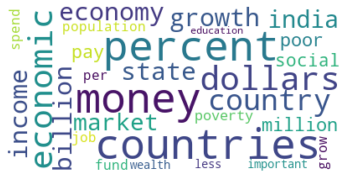

In [104]:
text = lda_model.print_topic(15, topn = 30)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [108]:
cm = CoherenceModel(model=lda_model, corpus=bow_corpus, coherence='u_mass')
coherence = cm.get_coherence()

In [109]:
coherence

-1.6052275976696384

In [110]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

C:\Users\asus\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.070988  0.113551       1        1  6.650401
34     0.073207  0.130129       2        1  5.153476
12     0.169141  0.005014       3        1  5.077780
25     0.070427  0.010069       4        1  4.427895
15     0.058385 -0.135064       5        1  4.107470
6      0.137266 -0.061111       6        1  3.515076
36     0.062211 -0.071985       7        1  3.219391
3      0.081001  0.108358       8        1  3.131649
13    -0.039033  0.035435       9        1  3.087568
41    -0.059270  0.059431      10        1  3.048263
22    -0.031966  0.046777      11        1  2.990892
35    -0.097651  0.056981      12        1  2.988555
42    -0.139329 -0.067685      13        1  2.915981
45    -0.009862 -0.151540      14        1  2.861115
0      0.004598  0.017789      15        1  2.626484
1     -0.086324  0.103397      16        1  2.613477
2     -0.040971 -0.043118      17        1  2.280566
9      0.024622 -0.145851      18        1  2.269580
23     0.065814  0.062987      19        1  2.255605
40     0.064752  0.021352      20        1  2.035915
47    -0.089199  0.067252      21        1  1.939283
38    -0.119594 -0.018613      22        1  1.887752
32     0.140355 -0.038077      23        1  1.741920
44     0.159499  0.068021      24        1  1.730209
24    -0.105361 -0.075592      25        1  1.643247
10    -0.106077  0.123433      26        1  1.631328
11     0.127390  0.093046      27        1  1.574329
29     0.110049 -0.039997      28        1  1.502814
48     0.118135 -0.126210      29        1  1.462570
27    -0.081501 -0.001901      30        1  1.397782
19     0.031934  0.159856      31        1  1.306823
5     -0.145206 -0.048132      32        1  1.295443
43     0.036571  0.053323      33        1  1.263207
49    -0.066051 -0.099307      34        1  1.190488
39    -0.139040  0.054284      35        1  1.031708
20    -0.031718 -0.080072      36        1  1.030594
16     0.015078  0.064370      37        1  1.014476
17     0.024169 -0.035009      38        1  0.957457
7      0.006585 -0.010409      39        1  0.925111
28     0.009467  0.036287      40        1  0.864088
33     0.014877 -0.143613      41        1  0.849190
31     0.033081 -0.019286      42        1  0.722623
21    -0.132222  0.014615      43        1  0.719406
8     -0.089044  0.048287      44        1  0.716985
26    -0.084463 -0.009170      45        1  0.661420
46    -0.017065 -0.121917      46        1  0.523335
4     -0.009423  0.030879      47        1  0.463121
30    -0.014487 -0.029439      48        1  0.309152
37     0.002588 -0.000053      49        1  0.226912
14     0.022668 -0.011772      50        1  0.160085, topic_info=     Category         Freq          Term        Total  loglift  logprob
5530  Default  3538.000000             ♫  3538.000000  30.0000  30.0000
1587  Default  4686.000000         brain  4686.000000  29.0000  29.0000
704   Default  4356.000000        school  4356.000000  28.0000  28.0000
1306  Default  2657.000000          food  2657.000000  27.0000  27.0000
650   Default  4317.000000        number  4317.000000  26.0000  26.0000
116   Default  3692.000000        design  3692.000000  25.0000  25.0000
1033  Default  3731.000000          play  3731.000000  24.0000  24.0000
1775  Default  4231.000000         women  4231.000000  23.0000  23.0000
215   Default  3837.000000           kid  3837.000000  22.0000  22.0000
229   Default  3430.000000         light  3430.000000  21.0000  21.0000
1647  Default  2010.000000          game  2010.000000  20.0000  20.0000
362   Default  2458.000000         sound  2458.000000  19.0000  19.0000
17    Default  1846.000000        africa  1846.000000  18.0000  18.0000
1690  Default  1677.000000         music  1677.000000  17.0000  17.0000
1544  Default  4037.000000         water  4037.000000  16.0000  16.0000
514   Default  3711.000000          data  3711.00